### 1. Read a jpeg image and print the image file

In [1]:
from PIL import Image

In [10]:
img = Image.open("flower.jpg")
print(img.format)

JPEG


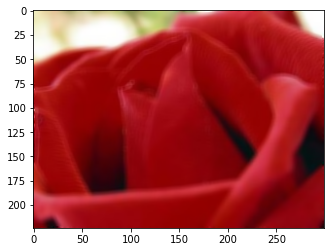

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img)

### 2. Merge two pdf files using python script

In [14]:
import PyPDF2 
 
pdf1File = open('07813389.pdf', 'rb')
pdf2File = open('22_REVIEW ARTICLE.pdf', 'rb')
 
pdf1Reader = PyPDF2.PdfFileReader(pdf1File)
pdf2Reader = PyPDF2.PdfFileReader(pdf2File)

pdfWriter = PyPDF2.PdfFileWriter()
 

for pageNum in range(pdf1Reader.numPages):
    pageObj = pdf1Reader.getPage(pageNum)
    pdfWriter.addPage(pageObj)

for pageNum in range(pdf2Reader.numPages):
    pageObj = pdf2Reader.getPage(pageNum)
    pdfWriter.addPage(pageObj)
 

pdfOutputFile = open('MergedFiles.pdf', 'wb')
pdfWriter.write(pdfOutputFile)

pdfOutputFile.close()
pdf1File.close()
pdf2File.close()

In [16]:
import requests
import MySQLdb
from bs4 import BeautifulSoup

### 3.Scrape a website and store the data into DB.

In [28]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
 user="root",
  password="Sqlpython123#",
)

mycursor = mydb.cursor()
print(mydb)

In [29]:
mycursor.execute("CREATE DATABASE webscrapedetails")
mycursor = mydb.cursor()

mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('doctor',)
('employee',)
('information_schema',)
('my_first_db',)
('mydatabase',)
('mysql',)
('performance_schema',)
('records',)
('student',)
('students',)
('sys',)
('usersdb',)
('webscrapedetails',)


In [ ]:
import urllib.request
import pandas as pd
import MySQLdb
from bs4 import BeautifulSoup
import datetime

#SQL connection parameters to save the data
HOST = "localhost"
USERNAME = "root"
PASSWORD = "Sqlpython123#"
DATABASE = "webscrapedetails"

#URL to be scraped
URL = "http://103.7.130.119:8181/GenOutageReportD.aspx"

#Load Html's plain data into a vairable
#SAUCE is a block of meta data that can be appended to various art works made by the scene. - source(https://pypi.org/project/sauce/)
sauce = urllib.request.urlopen(URL).read()
soup = BeautifulSoup(sauce, 'lxml') 

#Identify the table you want to scrap from the webpage using the table id
table = soup.find("table",{"id": "table1"})
#Extract all table rows from the table into table_rows variable
table_rows = table.find_all('tr')

#The following two lines of code are used to obtain the Select date at the top of the page
date_input = soup.find("input", {"id" : "txtOnDate"})
date = date_input['value']

#Some global variables required by the for loop
all_rows=[]
sector_type = ""

#Open database connection
db = MySQLdb.connect(HOST, USERNAME, PASSWORD, DATABASE)
#Prepare a cursor object using cursor method
cursor = db.cursor()
try:
    for tr in table_rows:
        #Extract all table data from each row
        td  = tr.find_all('td')
        # create a list "row" which contains each item from the table row
        row = [i.text.strip() for i in td]
        
        #Since the Sector type is mentioned at the top of each sectionof the table obtain the sector type.
        if len(row) == 2:
           sector_type = td[1].text.strip()

        #Obtain all the values from each table row which contain data such as station, state, agency, unit_no, capacity, reason, outage_date, outage_time, expected revival date
        if len(row) > 8:
            #now is used to obtain the timestamp for each row entered into the database in YYYY-MM-DD HH:MM:SS format
            now = datetime.datetime.now().isoformat()   
            #Form the SQL query to insert a record into the table
            sql_query = "insert into Planned values(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

            #Execute the sql command
            cursor.execute(sql_query, [date, sector_type, row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], str(now)])
            #Commit your changes in the database
            db.commit()
except:
    db.rollback()
    db.close()
    print("Data loading unsuccessful!!")
    
finally:
    #Close the database connecttion
    db.close()

print("Data loaded into Mysql successfully")